In [30]:
from datetime import timedelta

from my_python_library.flea_scope import FleaScope, Waveform
from my_python_library.trigger_config import AnalogTriggerBuilder, BitTriggerBuilder, BitState

import matplotlib.pyplot as plt

In [4]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [5]:
scope = FleaScope('/dev/ttyACM0', 115200)

In [6]:
scope.set_waveform(Waveform.EKG, 1000)

<Axes: >

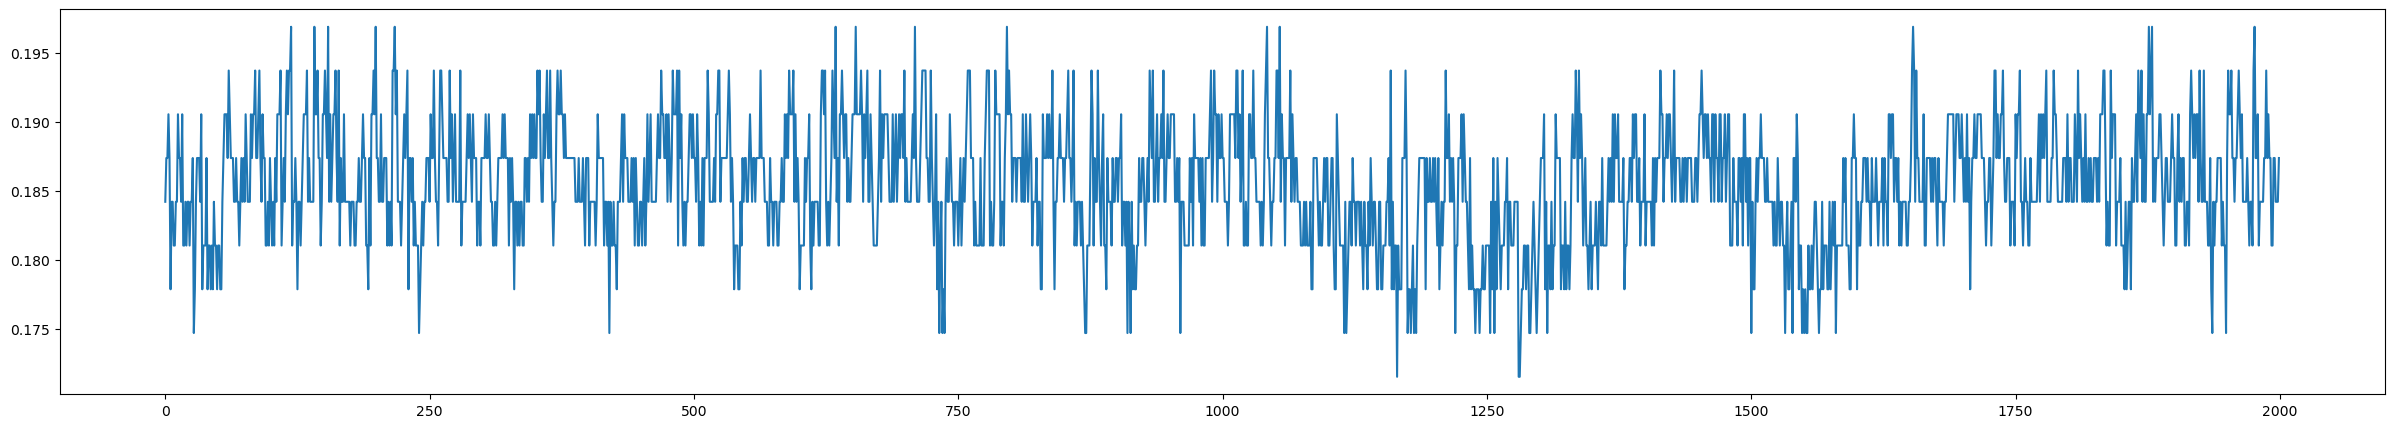

In [35]:
df = scope.probe1.read(
            timedelta(milliseconds=20),
            AnalogTriggerBuilder(2).auto(),
            delay=timedelta(milliseconds=9),
)

df['bnc'].plot(figsize=[30,5])

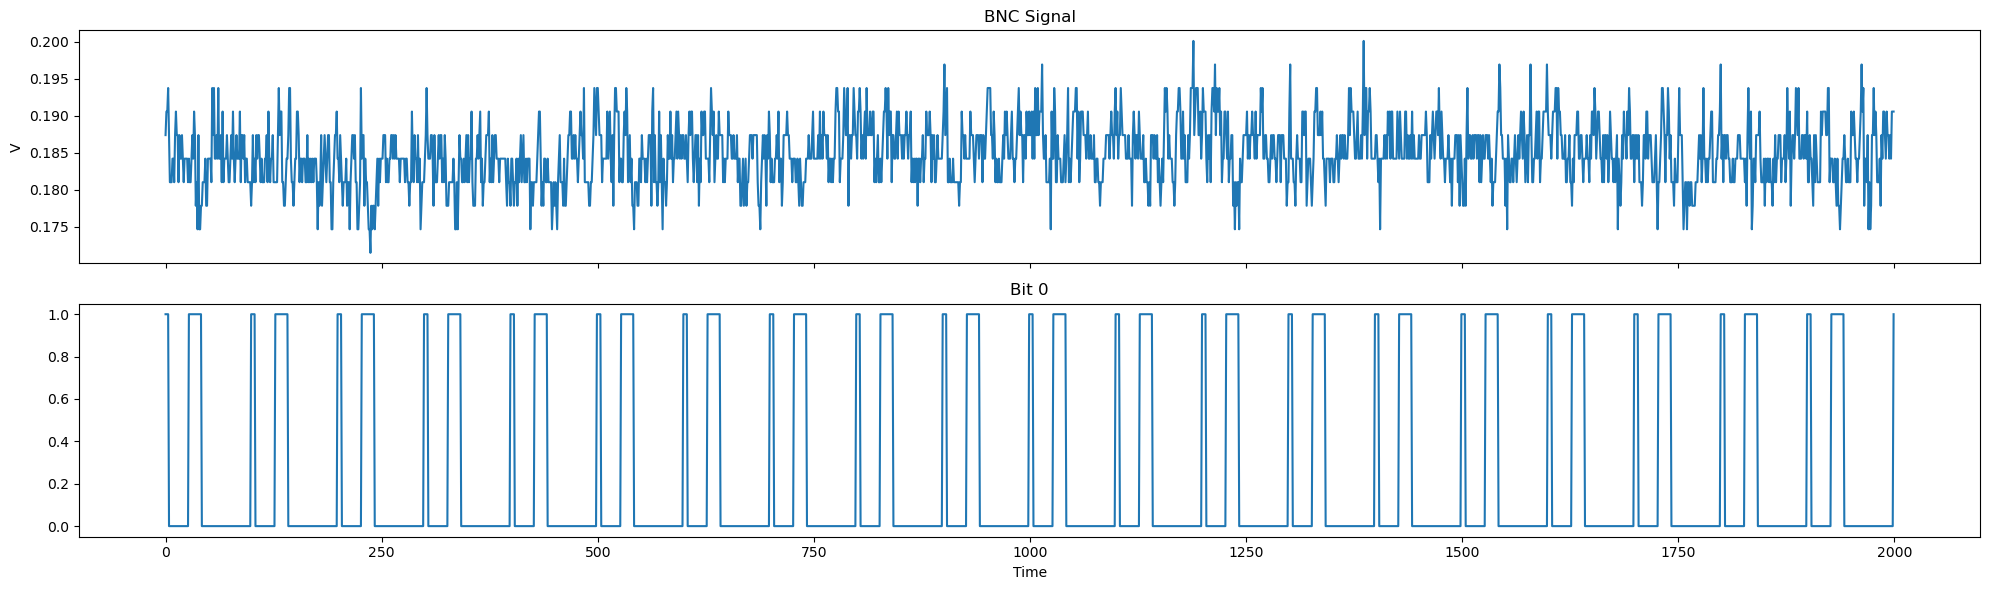

In [33]:
df = scope.probe1.read(
            timedelta(milliseconds=20),
            BitTriggerBuilder()
            .set_bit0(BitState.POSITIVE)
            .set_bit1(BitState.POSITIVE)
            .when_start_matching(),
            delay=timedelta(milliseconds=9),
)
df = scope.extract_bits(df)
df['bit_0'] = df['bit_0'].apply(int)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 6))

df['bnc'].plot(ax=axes[0], title='BNC Signal')
axes[0].set_ylabel('V')

df['bit_0'].plot(ax=axes[1], title='Bit 0')
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

In [27]:
scope.serial.send_ctrl_c()